Data Science: DATATHON - Predicciones
Caso: Programa de bicicletas compartidas (Bicycle share scheme)
Objetivo: Predecir la cantidad de biciletas que se alquilan 
Métrica de evaluación del modelo: Raíz del Error Cuadrático Medio (RECM o RMSE)

In [1]:
#0. Importación de librerías 
import openpyxl as op
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date
%matplotlib inline
import seaborn as sns
sns.set()

In [13]:
#1. Carga de tabla de entrenamiento del modelo
datos_entrena = pd.read_excel('bike_train.xlsx')

In [45]:
#exploración de datos de la tabla de entrenamiento
datos_entrena.describe()

,instant,FechaNumero,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,6000.000000,734391.626219,2.210684,0.279523,5.530294,11.556630,0.027752,3.009334,0.684057,1.435036,0.465704,0.448888,0.625770,0.196433,30.049837,128.545129,158.594966
std,3463.957275,145.218201,1.088798,0.448784,3.433005,6.911891,0.164269,2.005264,0.464910,0.650894,0.188576,0.169633,0.200637,0.125394,43.596915,124.692750,151.392952
min,1.000000,734138.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3000.500000,734266.000000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.303000,0.470000,0.104500,3.000000,29.000000,34.000000
50%,6000.000000,734392.000000,2.000000,0.000000,5.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.460000,0.454500,0.620000,0.194000,13.000000,98.000000,118.000000
75%,8999.500000,734517.000000,3.000000,1.000000,8.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.620000,0.590900,0.790000,0.283600,39.000000,185.000000,232.000000
max,11999.000000,734643.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.000000,1.000000,0.850700,367.000000,770.000000,957.000000


In [46]:
datos_entrena.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      11999 non-null  int64         
 1   dteday       11999 non-null  datetime64[ns]
 2   FechaNumero  11999 non-null  int64         
 3   season       11999 non-null  int64         
 4   yr           11999 non-null  int64         
 5   mnth         11999 non-null  int64         
 6   hr           11999 non-null  int64         
 7   holiday      11999 non-null  int64         
 8   weekday      11999 non-null  int64         
 9   workingday   11999 non-null  int64         
 10  weathersit   11999 non-null  int64         
 11  temp         11999 non-null  float64       
 12  atemp        11999 non-null  float64       
 13  hum          11999 non-null  float64       
 14  windspeed    11999 non-null  float64       
 15  casual       11999 non-null  int64         
 16  regi

In [14]:
#Análisis y evaluación de datos de la tabla de entrenamiento
#Codifica un numero (valor entero) por fecha
datos_entrena.insert(2, 'FechaNumero',datos_entrena['dteday'].map(date.toordinal))

In [15]:
datos_entrena.head(5)

,instant,dteday,FechaNumero,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,734138,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,734138,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,734138,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,734138,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,734138,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
#Analisis de correlación entre variables
corr = datos_entrena.corr()

In [47]:
corr

,instant,FechaNumero,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.999990,0.118039,0.777284,0.167195,-0.007446,0.008323,0.007103,0.005295,-0.015359,0.029297,0.042490,-0.013275,-0.029001,0.115768,0.238546,0.229814
FechaNumero,0.999990,1.000000,0.119277,0.776468,0.168474,-0.009457,0.008254,0.007121,0.005410,-0.015217,0.030437,0.043644,-0.012197,-0.029317,0.115635,0.238038,0.229357
season,0.118039,0.119277,1.000000,-0.446665,0.865268,-0.007610,-0.008928,-0.003688,0.012630,-0.009029,0.410790,0.413196,0.198937,-0.142924,0.119043,0.093595,0.111369
yr,0.777284,0.776468,-0.446665,1.000000,-0.488103,-0.003948,0.001039,-0.002714,0.001068,-0.006309,-0.198929,-0.190360,-0.141319,0.067356,0.053371,0.171910,0.156960
mnth,0.167195,0.168474,0.865268,-0.488103,1.000000,-0.007060,0.009372,0.014500,0.006441,-0.012239,0.353330,0.358541,0.201669,-0.147042,0.078563,0.061686,0.073431
hr,-0.007446,-0.009457,-0.007610,-0.003948,-0.007060,1.000000,0.000414,-0.004037,0.003454,-0.024003,0.139251,0.134633,-0.257202,0.130441,0.285182,0.381933,0.396698
holiday,0.008323,0.008254,-0.008928,0.001039,0.009372,0.000414,1.000000,-0.102503,-0.248601,-0.014707,-0.028519,-0.038005,-0.036672,0.022681,0.022140,-0.044534,-0.030304
weekday,0.007103,0.007121,-0.003688,-0.002714,0.014500,-0.004037,-0.102503,1.000000,0.031057,0.017259,-0.010002,-0.009841,-0.025932,0.008447,0.023687,0.019179,0.022618
workingday,0.005295,0.005410,0.012630,0.001068,0.006441,0.003454,-0.248601,0.031057,1.000000,0.042202,0.062273,0.066305,0.022805,-0.002493,-0.298241,0.134789,0.025132
weathersit,-0.015359,-0.015217,-0.009029,-0.006309,-0.012239,-0.024003,-0.014707,0.017259,0.042202,1.000000,-0.080149,-0.081386,0.430378,0.009195,-0.147903,-0.130223,-0.149848


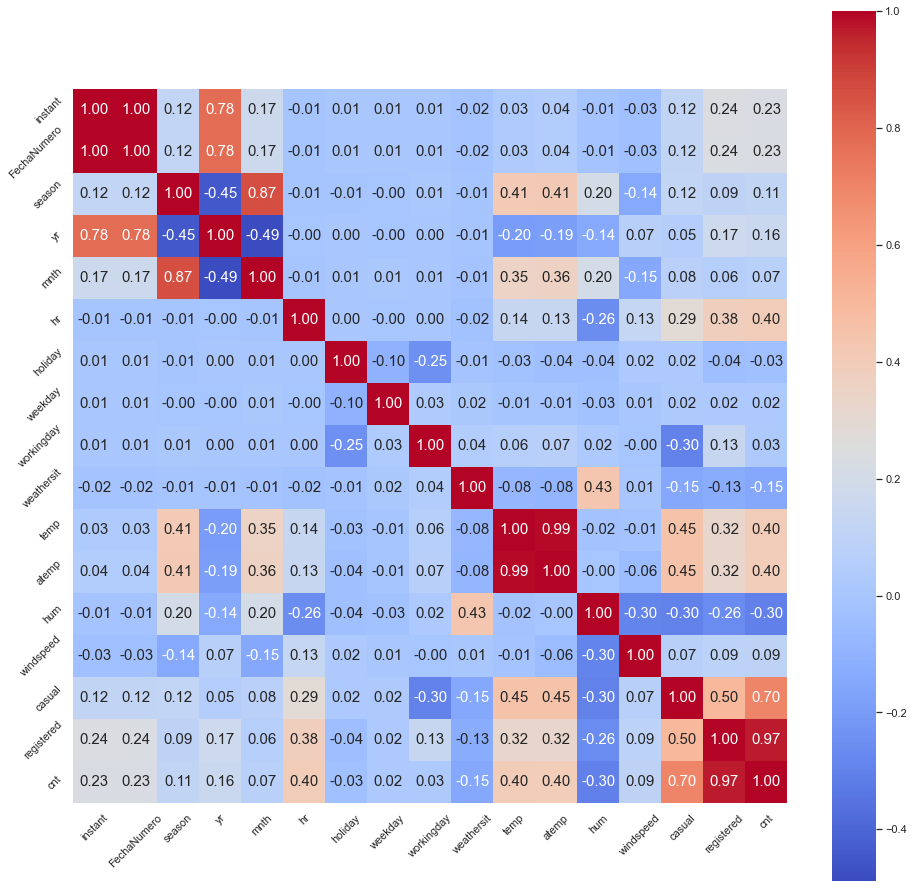

In [18]:
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [19]:
#MODELO DE REGRESION LINEAL
#Aplicamos una Regresión Lineal que nos permite predecir el valor de cantidad de bicicletas 
# rentadas(variable dependiente) según el valor de las mejores variables seleccionadas 
# según el criterio del Raíz del Error Cuadrático Medio (RECM o RMSE)
from sklearn.linear_model import LinearRegression

In [20]:
datos_entrena.columns

Index(['instant', 'dteday', 'FechaNumero', 'season', 'yr', 'mnth', 'hr',
       'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [21]:
#Buscamos el menor valor del error cuadrático medio entre las variables del registro
#Valor del error cuadrático medio de la variable Numero de Fecha y cantidad de bicicletas rentadas
X_train = np.array(datos_entrena[['FechaNumero']])
y_train = np.array(datos_entrena[['cnt']])
modelo = LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)
modelo.coef_
from sklearn.metrics import mean_squared_error
y_train_pred = modelo.predict(X_train)
print('Error en datos de entrenamiento:', mean_squared_error(y_train, y_train_pred))
RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE

Error en datos de entrenamiento: 21712.329122531966


147.35104045283143

In [22]:
#Valor del error cuadrático medio con la variable hora de registro con cantidad de bicicletas rentadas
X_train = np.array(datos_entrena[['hr']])
y_train = np.array(datos_entrena[['cnt']])
modelo = LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)
modelo.coef_
from sklearn.metrics import mean_squared_error
y_train_pred = modelo.predict(X_train)
print('Error en datos de entrenamiento:', mean_squared_error(y_train, y_train_pred))
RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE

Error en datos de entrenamiento: 19311.33777042172


138.96523943210303

In [24]:
#Valor de l error cuadrático medio con la variable hora de registro y sensacion térmica con cantidad de bicicletas registradas
X_train = np.array(datos_entrena[['hr','atemp']])
y_train = np.array(datos_entrena[['cnt']])
modelo = LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)
modelo.coef_
from sklearn.metrics import mean_squared_error
y_train_pred = modelo.predict(X_train)
print('Error en datos de entrenamiento:', mean_squared_error(y_train, y_train_pred))
RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE

Error en datos de entrenamiento: 16584.067555638274


128.7791425489325

In [25]:
#Valor del error cuadrático medio con la variable hora del registro, sensacion térmica 
X_train = np.array(datos_entrena[['hr','atemp', 'hum']])
y_train = np.array(datos_entrena[['cnt']])
modelo = LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)
modelo.coef_
from sklearn.metrics import mean_squared_error
y_train_pred = modelo.predict(X_train)
print('Error en datos de entrenamiento:', mean_squared_error(y_train, y_train_pred))
RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE

Error en datos de entrenamiento: 15475.557630079365


124.40079433058041

In [27]:
#Valor del error cuadrático medio con la variable hora del registro, sensacion térmica, numnero de dia con cantidad de bicicletas rentadas
X_train = np.array(datos_entrena[['hr','atemp','FechaNumero']])
y_train = np.array(datos_entrena[['cnt']])
modelo = LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)
modelo.coef_
from sklearn.metrics import mean_squared_error
y_train_pred = modelo.predict(X_train)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE

Error en datos de train: 15497.867759297978


124.49043240063864

In [28]:
#Valor del error cuadrático medio con la variable hora del registro, sensacion térmica, humedad,numnero de dia con cantidad de bicicletas rentadas
X_train = np.array(datos_entrena[['hr','atemp', 'hum','FechaNumero']])
y_train = np.array(datos_entrena[['cnt']])
modelo = LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)
modelo.coef_
from sklearn.metrics import mean_squared_error
y_train_pred = modelo.predict(X_train)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE

Error en datos de train: 14425.258410658587


120.10519726747293

In [29]:
#Analizamos los datos de Prueba del Modelo
datos_test = pd.read_excel('bike_test.xlsx')

In [30]:
datos_test

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,12000,2012-05-20,2,1,5,4,0,0,0,1,0.52,0.5000,0.68,0.0896
1,12001,2012-05-20,2,1,5,5,0,0,0,1,0.50,0.4848,0.72,0.1045
2,12002,2012-05-20,2,1,5,6,0,0,0,1,0.50,0.4848,0.63,0.1343
3,12003,2012-05-20,2,1,5,7,0,0,0,1,0.52,0.5000,0.68,0.1940
4,12004,2012-05-20,2,1,5,8,0,0,0,1,0.56,0.5303,0.56,0.1642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642
5376,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642
5377,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642
5378,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343


In [31]:
#Inserta el dato numero de fecha 
datos_test.insert(2, 'FechaNumero',datos_test['dteday'].map(date.toordinal))

In [32]:
#Asignación de array: las variables que menor valor obtuvieron en el error cuadratico medio en el entrenamiento
X_test = np.array(datos_test[['hr','atemp', 'hum','FechaNumero']])

In [33]:
#Genera la preseiccion
y_test_pred = modelo.predict(X_test)

In [34]:
y_test_pred

array([[172.59148749],
       [167.59741577],
       [189.26341055],
       ...,
       [271.36731513],
       [289.23620899],
       [280.47586192]])

In [35]:
#carga la predicción resultante
samlygiron = pd.DataFrame()

In [36]:
#Crea la columna solicitada "pred" con la columna de la predicción
samlygiron['pred'] = pd.DataFrame(y_test_pred)

In [37]:
#carga la columna de la predicción a dos decimales
samlygiron['pred'] = samlygiron['pred'].round(2)

In [39]:
#Entrega de predicción: cantidad de bicicletas rentadas en numero entero
samlygiron['pred'] = samlygiron['pred'].astype('int')

In [40]:
samlygiron

,pred
0,172
1,167
2,189
3,191
4,228
...,...
5375,258
5376,264
5377,271
5378,289


In [41]:
#Exporta a .csv la columna resultante solicitada 
samlygiron.to_csv('samlygiron.csv', index = False, encoding= 'utf-8')

In [42]:
samlygiron

,pred
0,172
1,167
2,189
3,191
4,228
...,...
5375,258
5376,264
5377,271
5378,289


In [ ]:
#Confirma cantidad de registros entre la predcción y el archivo de test

In [43]:
samlygiron.describe()

,pred
count,5380.000000
mean,265.113011
std,80.301057
min,66.000000
25%,196.000000
50%,268.000000
75%,333.000000
max,455.000000


In [44]:
datos_test.describe()

,instant,FechaNumero,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,5380.000000,5380.000000,5380.000000,5380.0,5380.000000,5380.000000,5380.000000,5380.000000,5380.00000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000
mean,14689.500000,734755.184572,3.150558,1.0,8.784758,11.524721,0.031041,2.991078,0.67974,1.403532,0.566758,0.535741,0.630483,0.175968
std,1553.216555,65.266109,0.839184,0.0,2.145166,6.920601,0.173444,2.007032,0.46662,0.612343,0.182800,0.161300,0.174493,0.113988
min,12000.000000,734643.000000,1.000000,1.0,5.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.140000,0.151500,0.160000,0.000000
25%,13344.750000,734699.000000,3.000000,1.0,7.000000,6.000000,0.000000,1.000000,0.00000,1.000000,0.400000,0.409100,0.490000,0.104500
50%,14689.500000,734755.000000,3.000000,1.0,9.000000,12.000000,0.000000,3.000000,1.00000,1.000000,0.600000,0.575800,0.640000,0.164200
75%,16034.250000,734812.000000,4.000000,1.0,11.000000,18.000000,0.000000,5.000000,1.00000,2.000000,0.700000,0.666700,0.780000,0.253700
max,17379.000000,734868.000000,4.000000,1.0,12.000000,23.000000,1.000000,6.000000,1.00000,3.000000,1.000000,0.924200,1.000000,0.656700
